<b>Привет, Демьян!</b>

Меня зовут Харочкина Екатерина, и я буду проверять твой проект. Давай общаться на «ты», но если это неудобно, пожалуйста, сообщи. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.

Ты подготовил замечательный проект, но есть аспекты, которые еще можно улучшить. Я буду использовать комментарии с цветовой разметкой. Пожалуйста, **не перемещай, не изменяй и не удаляй их**. Это поможет выполнить повторную проверку твоего проекта оперативнее.

<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> ❌
    
Таким комментарием выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> ⚠️
    
Таким комментарием выделены небольшие замечания и рекомендации, которые будет хорошо учесть.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
Таким комментарием выделены удачные решения🙂
</div>

Свои комментарии ты можешь помечать синим цветом.

<div class="alert alert-info">
<b>Комментарий студента №1</b>
    
Так ты можешь оформить свой комментарий
</div>

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. После того, как ты все доработаешь, я смогу принять твой проект!) 

<h1> Защита персональных данных клиентов

**Цели проекта:**

1. Защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

2. Защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных:**

- Набор данных находится в файле `/datasets/insurance.csv.`
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

**Этапы проекта:**

1. [Загрузка данных](#1)

2. [Умножение матриц](#2)

3. [Алгоритм преобразования](#3)

4. [Проверка алгоритма](#4)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
Хорошее начало!
</div>

<h2><a id='1'></a> Загрузка данных

Импортируем необходимые библиотеки для будущей работы. Считаем данные из csv-файла в переменную `df` и изучим их.

Путь к файлу: `/datasets/insurance.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_style('darkgrid')

In [2]:
try:
    df = pd.read_csv('C:\jupyter projects\linal\insurance.csv')
except:
    df = pd.read_csv('/datasets/insurance.csv')

Размерность датасета:(5000, 5)

Дубликаты: 153

Пропущенные значения:
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


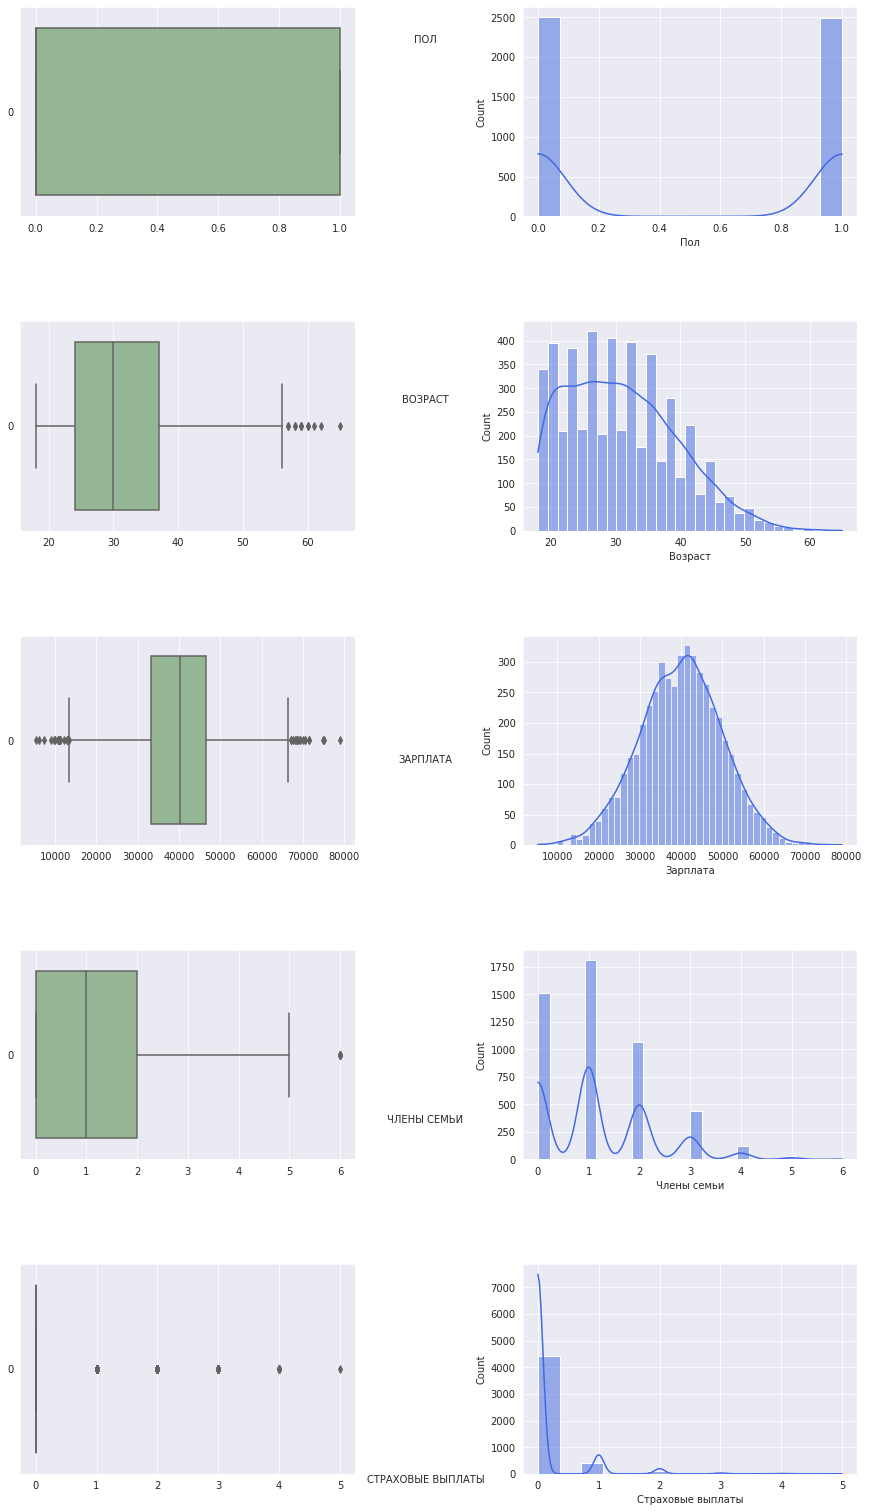

In [3]:
print(f'Размерность датасета:{df.shape}\n')
print(f'Дубликаты: {df.duplicated().sum()}\n')
print(f'Пропущенные значения:\n{df.isna().sum()}\n')
display(df.info(), 
       df.describe())

plt.figure(figsize=[15, 25])
plt.subplots_adjust(top=0.94, wspace=0.5, hspace=0.5)

for idx, column_name in enumerate(df.columns):
    # boxplot
    plt.subplot(5, 2, 2*idx + 1)
    sns.boxplot(data=df[column_name], orient='h', color='darkseagreen')

    # histplot
    plt.subplot(5, 2, 2*idx + 2)
    sns.histplot(df[column_name], color='royalblue', kde=True)
    
    # title
    y_position = 1 - (0.4+idx) / 5 
    plt.gcf().text(0.5, y_position, column_name.upper(), ha='center', fontsize=10)

plt.show();

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> ⚠️
    
Часть признаков содержат количественные значения, а часть качественные + есть ненормальное распределение, поэтому матрица корреляции Пирсона здесь не подойдет
</div>

<div class="alert alert-info">
<b>Комментарий студента №1</b>
    
Убрал матрицу корреляции.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> ✅
    
👍
</div>

**Вывод:**

В исходных данных:
- Нет пропущенных значений
- Присутствуют дубликаты/совпадающие значения
- Присутствуют выбросы

Не будем проводить предобработку данных, так как в данном проекте это не принесет какого-то улучшения результатов.

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
Так как у нас нет id клиента и у нас мало столбцов и они достаточно общие, поэтому вполне возможно, что это не дубликаты, а просто совпадающие данные.
</div>

<h2><a id='2'></a> Умножение матриц

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Формулы:**

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответьте на вопрос и обоснуйте решение.**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 
a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Разберемся, как изменение признаков путем умножения их на обратимую матрицу влияет на качество линейной регрессии.

В исходной задаче:
$$𝑤=(𝑋′^𝑇 𝑋′)^{−1} 𝑋′^𝑇𝑦$$

При умножении признаков на матрицу 𝑃:
$$𝑋′=𝑋𝑃$$

Следовательно, уравнение для весов в преобразованных данных:
$$𝑤′=((𝑋𝑃)^𝑇 𝑋𝑃)^{-1})(𝑋𝑃)^𝑇 𝑦$$

Разложим данное выражение:
$$𝑤′=(𝑃^𝑇 𝑋^𝑇 𝑋𝑃)^{−1} 𝑃^𝑇 𝑋^𝑇 𝑦$$

Поскольку матрица 𝑃 обратима, мы можем использовать свойства обратных матриц и умножения матриц:
$$𝑤′=𝑃^{−1}(𝑋^𝑇 𝑋)^{−1}(𝑃^𝑇)^{−1}𝑃^𝑇 𝑋^𝑇𝑦 = 𝑃^{−1}(𝑋^𝑇 𝑋)^{−1} 𝑋^𝑇 𝑦$$

Теперь сравним это с исходным уравнением:
$$𝑤 = (𝑋^𝑇 𝑋)^{−1} 𝑋^𝑇𝑦$$

Мы видим, что связь между параметрами в исходной задаче и преобразованной задаче такова:
$$𝑤′=𝑃^{−1} 𝑤$$

Предсказание в линейной регрессии делается по формуле:
$$ŷ=𝑋𝑤$$

После умножения на обратимую матрицу 𝑃, матрица признаков становится 𝑋′=𝑋𝑃.
Следовательно, новые предсказания будут:
$$ŷ′=𝑋′𝑤′$$

$$ŷ′=𝑋𝑃⋅𝑃^{−1} 𝑤=𝑋𝑤=ŷ$$

Таким образом, умножение признаков на обратимую матрицу не изменяет качество линейной регрессии. Это происходит потому, что веса в преобразованной задаче можно выразить через веса исходной задачи, умноженные на обратную матрицу 𝑃. При этом предсказания, полученные на основе преобразованных данных, будут совпадать с предсказаниями, полученными на основе исходных данных. Это значит, что функция потерь (например, среднеквадратичная ошибка) останется неизменной, следовательно, и метрика качества модели не изменится. В итоге, преобразование данных умножением на обратимую матрицу сохраняет качество модели, предоставляя при этом дополнительные возможности для обеспечения безопасности или других операций с данными.

**Ответ:**

b. Не изменится. Параметры линейной регрессии в исходной задаче и в преобразованной связаны через умножение на матрицу 𝑃, но предсказания остаются такими же, как и до преобразования.

<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> ❌
    
Добавь, пожалуйста, уравнение связи для параметров
</div>

<div class="alert alert-info">
<b>Комментарий студента №1</b>
    
Добавил.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера №2</b> ❌
    
$w′=𝑃w$ - это неверно. Попробуй правильно раскрыть скобки в выражении $𝑤′=(𝑃^𝑇 𝑋^𝑇 𝑋𝑃)^{−1}𝑃^𝑇 𝑋^𝑇𝑦$
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера №3</b> ❌
    
Поскольку $𝑤′=((𝑋𝑃)^𝑇 𝑋𝑃)^{-1})(𝑋𝑃)^𝑇 𝑦 = (𝑃^𝑇 𝑋^𝑇 𝑋𝑃)^{−1}𝑃^𝑇 𝑋^𝑇𝑦 = 𝑃^{−1}(𝑋^𝑇 𝑋)^{−1}(𝑃^𝑇)^{−1}𝑃^𝑇 𝑋^𝑇𝑦 = 𝑃^{−1}(𝑋^𝑇 𝑋)^{−1} 𝑋^𝑇𝑦$

А $w = (𝑋^𝑇 𝑋)^{−1} 𝑋^𝑇𝑦$, то связь между параметрами
    
$𝑤′ = 𝑃^{−1}w$
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера №4</b> ✅
    
Теперь верно
</div>

<h2><a id='3'></a> Алгоритм преобразования

**Алгоритм:**

Для того, чтобы обеспечить конфиденциальность данных без ухудшения качества работы линейной регрессии, можно преобразовать исходные данные, умножив их на обратимую матрицу. Преобразование с использованием обратимой матрицы является обратимым, что позволяет восстановить исходные данные при необходимости.

Алгоритм преобразования данных:

- Выбрать или сгенерировать обратимую матрицу P размером n×n, где n - количество признаков в исходных данных.
- Умножить исходную матрицу признаков X на матрицу P для получения преобразованной матрицы X′.
- Произвести обучение линейной регрессии на преобразованных данных.

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
👍
</div>

**Обоснование:**

При умножении исходных данных на обратимую матрицу, предсказания линейной регрессии остаются без изменений. Это мы доказали в предыдущем блоке.

Полученное выражение идентично тому, что было бы при обучении на исходных данных, что гарантирует сохранение качества предсказаний линейной регрессии.

Таким образом, преобразование данных с помощью умножения на обратимую матрицу обеспечивает сохранение качества линейной регрессии и одновременно позволяет сделать данные менее интерпретируемыми для посторонних лиц.

**Подтвердим наше объяснение на практике. Для этого:**

- Создадим исходные данные X и целевую переменную y.
- Умножим X на случайную обратимую матрицу P.
- Обучим линейную регрессию на исходных данных и на преобразованных.
- Сравним предсказания обеих моделей.

In [4]:
# случайные данные
np.random.seed(43)

X = np.random.rand(100, 3) 
y = np.random.rand(100, 1)

# добавляем столбец с единицами к исходным данным
X = np.hstack((np.ones((100,1)), X))

# обратимая матрица P
P = np.random.rand(3, 3)
while np.linalg.det(P) == 0:  # проверка на обратимость
    P = np.random.rand(3, 3)

P_with_bias = np.eye(4)  # создание единичной матрицы размером 4x4
P_with_bias[1:4, 1:4] = P  # замена нижнего правого 3x3 блока на матрицу P

# преобразование данных
X_transformed = X @ P_with_bias

# обучение линейной регрессии на исходных данных
w = np.linalg.inv(X.T @ X) @ X.T @ y

# обучение линейной регрессии на преобразованных данных
w_transformed = np.linalg.inv(X_transformed.T @ X_transformed) @ X_transformed.T @ y

# предсказания для исходных и преобразованных данных
y_pred = X @ w
y_pred_transformed = X_transformed @ w_transformed

# сравнение предсказаний
mse_original = np.mean((y - y_pred)**2)
mse_transformed = np.mean((y - y_pred_transformed)**2)

print(f"MSE for original data: {mse_original}")
print(f"MSE for transformed data: {mse_transformed}")
print(f'Разница: {mse_original-mse_transformed}')

MSE for original data: 0.08616440649094076
MSE for transformed data: 0.08616440649094079
Разница: -2.7755575615628914e-17


<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> ❌
    
Здесь ты не учитываешь добавление столбца с единицами к признакам
</div>

<div class="alert alert-info">
<b>Комментарий студента №1</b>
    
Добавил столбец с единицами.
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера №2</b> ⚠️
    
Все библиотеки нужно импортировать в одной ячейке в начале всего кода, это соответствует стилистическому гайду <a href="https://peps.python.org/pep-0008/">pep 8</a>
</div>

Видно, что MSE для исходных и преобразованных данных очень близки, что подтверждает наше теоретическое обоснование.

<h2><a id='4'></a> Проверка алгоритма

Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

In [5]:
class DataTransformer:
    # инициализация основных атрибутов: признаки и целевая переменная
    def __init__(self, df):
        self.features = df.drop(['Страховые выплаты'], axis=1).values
        self.target = df['Страховые выплаты'].values
        self.P = None

    # генерация обратимой матрицы для преобразования данных
    def generate_transform_matrix(self):
        n_features = self.features.shape[1]
        P = np.random.rand(n_features, n_features)
        while np.linalg.det(P) == 0:
            P = np.random.rand(n_features, n_features)
        self.P = P

    # преобразование данных с использованием матрицы P
    def transform_data(self):
        return self.features.dot(self.P)
    
    # обучение и проверка качества линейной регрессии на исходных и преобразованных данных
    def test_regression_quality(self):
        # обучение на исходных данных
        model_original = LinearRegression().fit(self.features, self.target)
        predictions_original = model_original.predict(self.features)
        
        # обучение на преобразованных данных
        transformed_features = self.transform_data()
        model_transformed = LinearRegression().fit(transformed_features, self.target)
        predictions_transformed = model_transformed.predict(transformed_features)

        # R2 для обеих моделей
        r2_original = r2_score(self.target, predictions_original)
        r2_transformed = r2_score(self.target, predictions_transformed)

        return r2_original, r2_transformed

# тестирование
transformer = DataTransformer(df)
transformer.generate_transform_matrix()
r2_original, r2_transformed = transformer.test_regression_quality()

print(f"R2 на исходных данных: {r2_original}")
print(f"R2 на преобразованных данных: {r2_transformed}")

R2 на исходных данных: 0.4249455028666801
R2 на преобразованных данных: 0.4249455028666802


<h2> Вывод

По итогам проекта, можно предложить умножение признаков на обратимую матрицу в качестве метода защиты данных для компании «Хоть потоп». 

Этот метод работает, потому что умножение на обратимую матрицу является обратимой операцией. То есть можно вернуться к исходной матрице признаков, умножив преобразованную матрицу на обратную матрицу к той, которая использовалась для преобразования.

Для задач машинного обучения это преобразование обычно "безопасно" в том смысле, что качество модели на преобразованных данных будет таким же, как и на исходных данных. Это потому, что линейные алгоритмы регрессии не чувствительны к таким линейным преобразованиям.

В заключение, умножение на обратимую матрицу может служить полезным инструментом для анонимизации данных, но необходимо убедиться, что матрица и ее обратная версия хранятся в безопасном месте.

<div class="alert alert-block alert-success">
    
**Комментарий ревьюера №1** ✅

Верно, качество предсказания действительно не изменяется. Незначительное различие вызвано особенностями преобразования матриц и чисел с плавающей точкой. В случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных. Можно также попробовать декодировать данные обратно.
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
В целом, работа хорошая. Ты молодец! Остались небольшие доработки. Нужно доработать теоретическое доказательство и обоснование алгоритма преобразований. Доделывай и присылай на повторную проверку.

Жду твоих исправлений 😊
</font></b>
</div>

<div class="alert alert-info">
<b>Комментарий студента №1</b>
    
Привет! Спасибо за фидбэк. Замечания поправил и отметил это комментариями.
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
    
Отлично! Проект принят! 👏 Поздравляю и желаю удачи!
    
    
Оставлю несколько дополнительных материалов. Теория по обратным матрицам: https://www.berdov.com/works/matrix/obratnaya-matrica/. Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
Подробнее про аналогичный алгоритм: https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf
</font></b>
</div>